Задание Pro

Повысьте точность модели по обнаружению мин до 90 % на тестовой выборке. 

Можно использовать различные варианты слоев Dropout и BatchNormalization. Можно менять количество примеров в обучающей и проверочной выборках, но нельзя менять количество примеров в тестовой.

In [ ]:
#Подключим необходимые библиотеки

from tensorflow.keras.models import Sequential # НС прямого распространения
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization # Основные слои
from tensorflow.keras import utils # Утилиты для to_categorical
from tensorflow.keras.preprocessing import image # Для отрисовки изображения
from tensorflow.keras.optimizers import Adam, Adadelta # Алгоритмы оптимизации, для настройки скорости обучения
import numpy as np # Библиотека работы с массивами
import matplotlib.pyplot as plt # Отрисовка изображений
from PIL import Image # Отрисовка изображений
import pandas as pd # Библиотека pandas
from google.colab import files # Импорт файлов
from sklearn.preprocessing import LabelEncoder, StandardScaler # Функции для нормализации данных
from sklearn import preprocessing # Пакет предварительной обработки данных
from sklearn.model_selection import train_test_split

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline


# Подготовка данных для обучения сети

In [ ]:
# Загружаем файл с данными sonar.csv
files.upload()
!ls

Saving sonar.csv to sonar.csv
sample_data  sonar.csv


In [ ]:
# Загружаем данные из файла sonar.csv
df = pd.read_csv("sonar.csv", header=None)   
print(df.shape) # Размерность данных
df.head()                                   

(208, 61)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
dataset = df.values                 # Берем только значения массива(без индексов)
X = dataset[:,0:60].astype(float)   # Присваиваем переменной Х значения с 0 по 60 колонки, тип данных float
Y = dataset[:,60]                   # А переменной Y данные из столбца с индексом 60

Y[Y=='R']='0'                       # Если значение элемента столбца равно 'R', присваеваем ему значение '0'
Y[Y=='M']='1'                       # Если значение элемента столбца равно 'Y', присваеваем ему значение '1'
Y = Y.astype(int)                   # Меняем тип данных столбца на 'int'(целочисленный тип данных)      

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)  # будет выделено 20% от тренировочных данных на тестовую, и будут перемешаны

## Создание нейронной сети

In [ ]:
# Создаем сеть
model = Sequential()

# Добавляем слои
model.add(Dense(60, input_dim=60, activation='relu'))
model.add(Dense(30,  activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#Компилируем сеть
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [ ]:
# Обучаем сеть
history = model.fit(x_train, y_train, batch_size=8, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
17/17 [==============================] - 2s 22ms/step - loss: 0.6881 - accuracy: 0.5869 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6769 - accuracy: 0.6893 - val_loss: 0.6769 - val_accuracy: 0.5294
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6693 - accuracy: 0.6280 - val_loss: 0.6706 - val_accuracy: 0.5294
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6415 - accuracy: 0.7433 - val_loss: 0.6694 - val_accuracy: 0.5882
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6438 - accuracy: 0.6940 - val_loss: 0.6558 - val_accuracy: 0.6176
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6303 - accuracy: 0.6323 - val_loss: 0.6502 - val_accuracy: 0.6176
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6008 - accuracy: 0.7948 - val_loss: 0.6391 - val_accuracy: 0.6176
Epoch 8/100


## Визуализация качества обучения


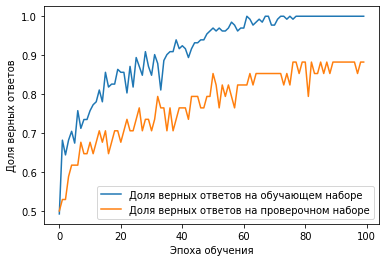

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

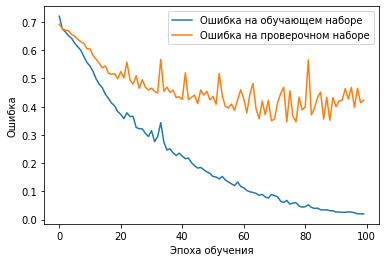

In [ ]:
# Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

Сразу нужного результа не добились. 

Как видно из графика ошибка на проверочной выборке пошла увеличиваться примерно после 70 эпохи. Поэтому можно попробовать обучать сеть именно столько.

## Вариант 2. Количество эпох - 70. Все остальные параметры те же



In [ ]:

model_2 = Sequential()


model_2.add(Dense(60, input_dim=60, activation='relu'))
model_2.add(Dense(30,  activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
#Компилируем сеть
model_2.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [ ]:
# Обучаем сеть
history_2 = model_2.fit(x_train, y_train, batch_size=8, epochs=70, validation_split=0.2, verbose=1)

Epoch 1/70
17/17 [==============================] - 0s 11ms/step - loss: 0.7059 - accuracy: 0.4207 - val_loss: 0.6798 - val_accuracy: 0.4706
Epoch 2/70
17/17 [==============================] - 0s 4ms/step - loss: 0.6699 - accuracy: 0.6298 - val_loss: 0.6649 - val_accuracy: 0.5882
Epoch 3/70
17/17 [==============================] - 0s 11ms/step - loss: 0.6857 - accuracy: 0.5767 - val_loss: 0.6552 - val_accuracy: 0.6176
Epoch 4/70
17/17 [==============================] - 0s 4ms/step - loss: 0.6354 - accuracy: 0.7333 - val_loss: 0.6417 - val_accuracy: 0.6176
Epoch 5/70
17/17 [==============================] - 0s 4ms/step - loss: 0.6068 - accuracy: 0.7385 - val_loss: 0.6276 - val_accuracy: 0.5882
Epoch 6/70
17/17 [==============================] - 0s 4ms/step - loss: 0.5862 - accuracy: 0.7318 - val_loss: 0.6105 - val_accuracy: 0.6471
Epoch 7/70
17/17 [==============================] - 0s 4ms/step - loss: 0.5924 - accuracy: 0.6950 - val_loss: 0.5968 - val_accuracy: 0.6176
Epoch 8/70
17/17 [

## Визуализация качества обучения


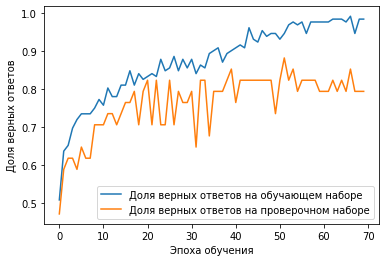

In [ ]:
plt.plot(history_2.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_2.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

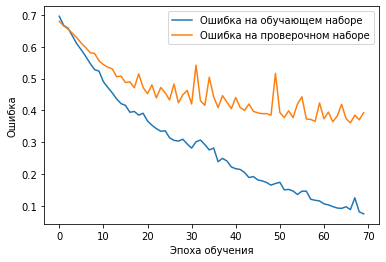

In [ ]:
# Выводим графики ошибки
plt.plot(history_2.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history_2.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

Как видно из графика ошика падает и не растет - Ура. 

Попробуем как работает сеть на тестовой выборке.

## Проверяем качество обучения на тестовом наборе данных

In [ ]:
# Вычисляем результаты сети на тестовом наборе
scores_2 = model_2.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores_2[1] * 100, 4), "%", sep="")

2/2 [==============================] - 0s 5ms/step - loss: 0.2849 - accuracy: 0.8333
Доля верных ответов на тестовых данных, в процентах: 83.3333%


Данные значения нас не устраивают. Попробуем добавить Dropout и/или BatchNormalization

## с Dropout и BatchNormalization. 'softmax' и 'relu'


In [ ]:
# Создаём сеть 
model_drop = Sequential()

model_drop.add(Dense(60, input_dim=60, activation='softmax'))  
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.2))
model_drop.add(Dense(30,  activation='relu'))                   
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.2))
model_drop.add(Dense(1, activation='sigmoid'))

# Компилируем сеть
model_drop.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Обучаем сеть
history_drop = model_drop.fit(x_train, y_train, batch_size=10, epochs=200, validation_split=0.2, verbose=1)

Epoch 1/200
14/14 [==============================] - 1s 15ms/step - loss: 0.6975 - accuracy: 0.6576 - val_loss: 0.6899 - val_accuracy: 0.5588
Epoch 2/200
14/14 [==============================] - 0s 6ms/step - loss: 0.5859 - accuracy: 0.6932 - val_loss: 0.6894 - val_accuracy: 0.5588
Epoch 3/200
14/14 [==============================] - 0s 5ms/step - loss: 0.4676 - accuracy: 0.7780 - val_loss: 0.6889 - val_accuracy: 0.5588
Epoch 4/200
14/14 [==============================] - 0s 5ms/step - loss: 0.4803 - accuracy: 0.7408 - val_loss: 0.6883 - val_accuracy: 0.5588
Epoch 5/200
14/14 [==============================] - 0s 14ms/step - loss: 0.5382 - accuracy: 0.7239 - val_loss: 0.6868 - val_accuracy: 0.5588
Epoch 6/200
14/14 [==============================] - 0s 6ms/step - loss: 0.4497 - accuracy: 0.7772 - val_loss: 0.6858 - val_accuracy: 0.5588
Epoch 7/200
14/14 [==============================] - 0s 6ms/step - loss: 0.4041 - accuracy: 0.8175 - val_loss: 0.6842 - val_accuracy: 0.5588
Epoch 8/200

## Визуализация качества обучения


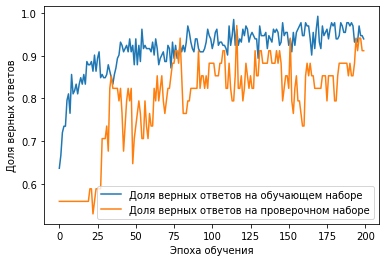

In [ ]:
plt.plot(history_drop.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_drop.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

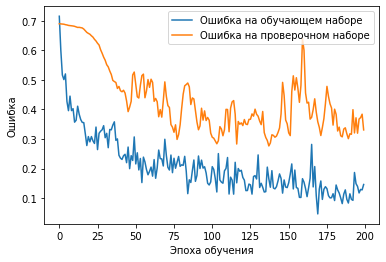

In [ ]:
# Выводим графики ошибки
plt.plot(history_drop.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history_drop.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

## Проверяем качество обучения на тестовом наборе данных

In [ ]:
# Вычисляем результаты сети на тестовом наборе
scores_drop = model_drop.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores_drop[1] * 100, 4), "%", sep="")

2/2 [==============================] - 0s 4ms/step - loss: 0.2579 - accuracy: 0.9048
Доля верных ответов на тестовых данных, в процентах: 90.4762%


Получилось! На тестовой выборке результат более 90%. Разной комбинации настроек гиперпараметров было более 50. Только для одной этой нейронной сети. Поэтому их все показывать нет смысла. 


 - Кол-во нейронов в слое Danse от 10 до 500
 - batch_size от 1 до полной выборки
 - Активационные функции: relu, elu, selu,softmax, tanh
 - validation_split от 0.1 до 0.2
 - кол-во эпох от 50 до 200
 - добавление слоя Dropout и установка его параметров (отключение нейронов от 0.1 до 0.3)

  -добавление слоя BatchNormalization (Если поставить этот слой на входе, то значительно увеличивает точность на проверочной выборке. Если в другом месте, то точность падает)


- В какой-то мере играет роль случай какие данные попадут в выборки (обучаемую,проверочную, тестовую)

 -Тяжело добиться такого результата потому что малая выборка (маленькая обучающая выборка) 

# Продолжение

Не смотря что результат уже есть, но опыт приходит с практикой. Поэтому продолжил эксперименты. И добавил еще один слой. Так же было более 50 разных экспериментов и перебор гиперпараметров. 

## BatchNormalization, 'softmax' и 'relu', 4 Dense слоя.
## Получилось без Dropout


In [ ]:
# Создаём сеть 
model_batch = Sequential()

model_batch.add(Dense(60, input_dim=60, activation='softmax'))  
model_batch.add(BatchNormalization())

model_batch.add(Dense(30,  activation='relu'))                   

model_batch.add(Dense(10,  activation='relu')) 

model_batch.add(Dense(1, activation='sigmoid'))

# Компилируем сеть
model_batch.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Обучаем сеть
history_batch = model_batch.fit(x_train, y_train, batch_size=10, epochs=200, validation_split=0.2, verbose=1)

Epoch 1/200
14/14 [==============================] - 1s 25ms/step - loss: 0.6914 - accuracy: 0.5887 - val_loss: 0.6920 - val_accuracy: 0.5588
Epoch 2/200
14/14 [==============================] - 0s 5ms/step - loss: 0.6769 - accuracy: 0.7312 - val_loss: 0.6911 - val_accuracy: 0.5588
Epoch 3/200
14/14 [==============================] - 0s 5ms/step - loss: 0.6656 - accuracy: 0.7645 - val_loss: 0.6906 - val_accuracy: 0.5588
Epoch 4/200
14/14 [==============================] - 0s 5ms/step - loss: 0.6441 - accuracy: 0.7365 - val_loss: 0.6889 - val_accuracy: 0.5588
Epoch 5/200
14/14 [==============================] - 0s 5ms/step - loss: 0.6227 - accuracy: 0.7989 - val_loss: 0.6868 - val_accuracy: 0.5294
Epoch 6/200
14/14 [==============================] - 0s 5ms/step - loss: 0.6181 - accuracy: 0.7029 - val_loss: 0.6886 - val_accuracy: 0.6765
Epoch 7/200
14/14 [==============================] - 0s 5ms/step - loss: 0.5740 - accuracy: 0.7870 - val_loss: 0.6813 - val_accuracy: 0.6176
Epoch 8/200


## Визуализация качества обучения


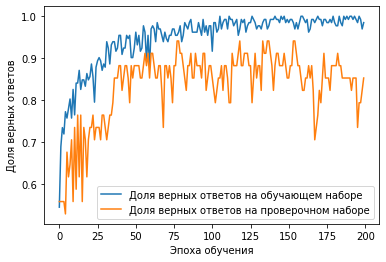

In [ ]:
plt.plot(history_batch.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_batch.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

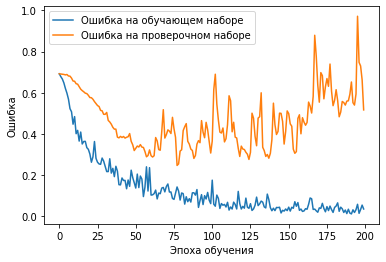

In [ ]:
# Выводим графики ошибки
plt.plot(history_batch.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history_batch.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

## Проверяем качество обучения на тестовом наборе данных

In [ ]:
# Вычисляем результаты сети на тестовом наборе
scores_batch = model_batch.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores_batch[1] * 100, 4), "%", sep="")

2/2 [==============================] - 0s 5ms/step - loss: 0.3698 - accuracy: 0.9048
Доля верных ответов на тестовых данных, в процентах: 90.4762%


# Выводы

Можно добиться еще более лучшего результата: 

-добавляя разные слои

-меняя количество нейронов в каждом слое

-используя другие активациооные функции и их сочетание

-добаляя слой Dropout c разными параметрами

-используя BatchNormalization  

-изменяя batch_size

-количество эпох epochs

-разделяя на обучающую и проверочные выборки

-используя другие оптимизаторы

-а так же увеличивая и улучшая базу для обучения

# Главный вывод

**Для работы с нейронными сетями нужны не только технические знания, а так же творческие идеи и огромное терпение)))**